In [1]:
import os 
project = '100knock-process-visualization'
chapter = 1
os.chdir(f'/home/jovyan/work/{project}/chapter-{chapter}')


# １章 システムデータの加工・可視化を行う２０本ノック

In [2]:
import pandas as pd


## ノック１：法人情報データを読み込んでみよう

In [3]:
pwd

'/home/jovyan/work/100knock-process-visualization/chapter-1'

In [4]:
data = pd.read_csv("./data/22_shizuoka_all_20210331.csv",encoding = "shift-jis")

In [5]:
data.head()

,1,1000013040008,01,1.1,2018-04-02,2015-10-05,静岡家庭裁判所,Unnamed: 7,101,静岡県,...,Unnamed: 20,Unnamed: 21,2015-10-05.1,1.2,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",Unnamed: 27,シズオカカテイサイバンショ,0
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0


In [6]:
len(data)

114612

## ノック２：読み込んだデータを確認しよう

In [7]:
data.columns

Index(['1', '1000013040008', '01', '1.1', '2018-04-02', '2015-10-05',
       '静岡家庭裁判所', 'Unnamed: 7', '101', '静岡県', '静岡市葵区', '城内町１−２０',
       'Unnamed: 12', '22', '101.1', '4200854', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       '2015-10-05.1', '1.2', 'Shizuoka Family Court', 'Shizuoka',
       '1-20, Jonaicho, Aoi ku, Shizuoka shi', 'Unnamed: 27', 'シズオカカテイサイバンショ',
       '0'],
      dtype='object')

In [8]:
len(data.columns)

30

In [9]:
data.dtypes

1                                         int64
1000013040008                             int64
01                                        int64
1.1                                       int64
2018-04-02                               object
2015-10-05                               object
静岡家庭裁判所                                  object
Unnamed: 7                              float64
101                                       int64
静岡県                                      object
静岡市葵区                                    object
城内町１−２０                                  object
Unnamed: 12                             float64
22                                        int64
101.1                                     int64
4200854                                 float64
Unnamed: 16                             float64
Unnamed: 17                             float64
Unnamed: 18                              object
Unnamed: 19                             float64
Unnamed: 20                             

### 意図しないデータ型が設定されてしまうことを防ぐためにobject型で読み込む

In [10]:
data = pd.read_csv("./data/22_shizuoka_all_20210331.csv",encoding = "shift-jis", dtype = object)

In [11]:
data.dtypes

1                                       object
1000013040008                           object
01                                      object
1.1                                     object
2018-04-02                              object
2015-10-05                              object
静岡家庭裁判所                                 object
Unnamed: 7                              object
101                                     object
静岡県                                     object
静岡市葵区                                   object
城内町１−２０                                 object
Unnamed: 12                             object
22                                      object
101.1                                   object
4200854                                 object
Unnamed: 16                             object
Unnamed: 17                             object
Unnamed: 18                             object
Unnamed: 19                             object
Unnamed: 20                             object
Unnamed: 21  

## ノック３：ヘッダ用のテキストファイルを読み込もう

In [12]:
mst = pd.read_csv("./data/mst_column_name.txt",encoding = "shift-jis")
mst.head()

,column_id\tcolumn_name_ja\tcolumn_name_en
0,1\t一連番号\tsequenceNumber
1,2\t法人番号\tcorporateNumber
2,3\t処理区分\tprocess
3,4\t訂正区分\tcorrect
4,5\t更新年月日\tupdateDate


In [13]:
mst = pd.read_csv("./data/mst_column_name.txt",encoding = "shift-jis",sep ='\t')
mst.head()

,column_id,column_name_ja,column_name_en
0,1,一連番号,sequenceNumber
1,2,法人番号,corporateNumber
2,3,処理区分,process
3,4,訂正区分,correct
4,5,更新年月日,updateDate


In [14]:
len(mst)

30

In [15]:
len(mst) == len(data.columns)

True

## ノック４：ヘッダ行を追加しよう

In [16]:
columns = mst.column_name_en.values  # valuesの意味？？

In [17]:
columns

array(['sequenceNumber', 'corporateNumber', 'process', 'correct',
       'updateDate', 'changeDate', 'name', 'nameImageId', 'kind',
       'prefectureName', 'cityName', 'streetNumber', 'addressImageId',
       'prefectureCode', 'cityCode', 'postCode', 'addressOutside',
       'addressOutsideImageId', 'closeDate', 'closeCause',
       'successorCorporateNumber', 'changeCause', 'assignmentDate',
       'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji'], dtype=object)

In [18]:
data.columns = columns
data.head(2)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0


## ノック５：統計量や欠損値を確認しよう

In [19]:
data.describe

<bound method NDFrame.describe of        sequenceNumber corporateNumber process correct  updateDate  changeDate  \
0                   2   1000013050072      01       1  2018-04-02  2015-10-05   
1                   3   1000013050080      01       1  2018-04-02  2015-10-05   
2                   4   1000020222119      01       1  2018-04-05  2015-10-05   
3                   5   1000020222127      01       1  2018-04-05  2015-10-05   
4                   6   1000020222135      01       1  2020-09-29  2015-10-05   
...               ...             ...     ...     ...         ...         ...   
114607         114609   9700150095744      01       0  2019-09-27  2019-08-22   
114608         114610   9700150097253      01       0  2020-01-24  2019-12-26   
114609         114611   9700150099530      01       0  2020-07-13  2020-06-23   
114610         114612   9700150099852      01       0  2020-08-20  2020-07-22   
114611         114613   9700150101659      01       0  2021-01-26  2021-01-

In [20]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113369
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113417
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114612
addressOutsideImageId       114612
closeDate                   104535
closeCause                  104535
successorCorporateNumber    113946
changeCause                 113501
assignmentDate                   0
latest                           0
enName                      114381
enPrefectureName            114383
enCityName                  114383
enAddressOutside            114612
furigana            

## ノック６：データの追加（繰り返し・読込・抽出・結合）

In [21]:
os.listdir('data')

['22_shizuoka_all_20210331.csv',
 'diff_20210401.csv',
 'diff_20210405.csv',
 'diff_20210406.csv',
 'diff_20210407.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_closeCause.csv',
 'mst_column_name.txt',
 'mst_corp_kind.csv',
 'mst_correct_kbn.csv',
 'mst_hihyoji.csv',
 'mst_latest.csv',
 'mst_process_kbn.csv',
 'output']

In [22]:
from glob import glob
diff_files = glob('data/diff*.csv')  # diffファイルをリストに追加
diff_files 

['data/diff_20210401.csv',
 'data/diff_20210405.csv',
 'data/diff_20210406.csv',
 'data/diff_20210407.csv',
 'data/diff_20210408.csv',
 'data/diff_20210409.csv']

In [23]:
diff_files.sort()
diff = pd.read_csv(diff_files[0], encoding='shift-jis', header=None, dtype=object)
diff.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1010001016019,71,0,2021-04-01,2021-03-01,株式会社国際漢方研究所,NaN,301,東京都,...,NaN,令和３年３月１日東京都渋谷区千駄ヶ谷五丁目２９番１１号ナカニシビル６０２号室株式会社Ｉｎｔｅ...,2015-10-05,1,NaN,NaN,NaN,NaN,コクサイカンポウケンキュウショ,0
1,2,1010001092869,01,1,2021-04-01,2020-06-11,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,0,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
2,3,1010001092869,21,0,2021-04-01,2021-03-22,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,1,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
3,4,1010001128061,01,1,2021-04-01,2015-10-05,日本アイ・ビー・エム株式会社,NaN,301,東京都,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,ニホンアイビーエム,0
4,5,1010001128061,71,1,2021-04-01,2017-10-02,日本アイ・ビー・エム株式会社,NaN,301,東京都,...,NaN,平成２９年１０月１日東京都中央区日本橋箱崎町１９番２１号アイ・ビー・エム・アジア・パシフィッ...,2015-10-05,1,NaN,NaN,NaN,NaN,ニホンアイビーエム,0


In [24]:
diff.columns = columns
diff.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1010001016019,71,0,2021-04-01,2021-03-01,株式会社国際漢方研究所,NaN,301,東京都,...,NaN,令和３年３月１日東京都渋谷区千駄ヶ谷五丁目２９番１１号ナカニシビル６０２号室株式会社Ｉｎｔｅ...,2015-10-05,1,NaN,NaN,NaN,NaN,コクサイカンポウケンキュウショ,0
1,2,1010001092869,01,1,2021-04-01,2020-06-11,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,0,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
2,3,1010001092869,21,0,2021-04-01,2021-03-22,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,1,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
3,4,1010001128061,01,1,2021-04-01,2015-10-05,日本アイ・ビー・エム株式会社,NaN,301,東京都,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,ニホンアイビーエム,0
4,5,1010001128061,71,1,2021-04-01,2017-10-02,日本アイ・ビー・エム株式会社,NaN,301,東京都,...,NaN,平成２９年１０月１日東京都中央区日本橋箱崎町１９番２１号アイ・ビー・エム・アジア・パシフィッ...,2015-10-05,1,NaN,NaN,NaN,NaN,ニホンアイビーエム,0


In [25]:
diff = diff.loc[diff['prefectureName'] == '静岡県']
print(len(diff))
diff.tail(3)

43


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
2159,2160,9080401024929,01,0,2021-04-01,2021-04-01,株式会社リガーレ,NaN,301,静岡県,...,NaN,NaN,2021-04-01,1,NaN,NaN,NaN,NaN,リガーレ,0
2160,2161,9080402007726,01,1,2021-04-01,2015-10-05,有限会社丸信商店,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,マルシンショウテン,0
2161,2162,9080402021917,21,0,2021-04-01,2021-03-30,有限会社岡本商会,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,オカモトショウカイ,0


### diffデータを、データに行追加(お試し)

In [26]:
data_test = data  # テスト用の変数にdataの中身をコピー
print(len(data_test))
print(len(data))
print(len(diff))
data_test = data_test.append(diff)  # data_testにdiff差分を追加
print(len(data_test))
data_test.tail(3)

114612
114612
43
114655


/tmp/ipykernel_1843/2425962003.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test = data_test.append(diff)  # data_testにdiff差分を追加


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
2159,2160,9080401024929,01,0,2021-04-01,2021-04-01,株式会社リガーレ,NaN,301,静岡県,...,NaN,NaN,2021-04-01,1,NaN,NaN,NaN,NaN,リガーレ,0
2160,2161,9080402007726,01,1,2021-04-01,2015-10-05,有限会社丸信商店,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,マルシンショウテン,0
2161,2162,9080402021917,21,0,2021-04-01,2021-03-30,有限会社岡本商会,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,オカモトショウカイ,0


### for文で繰り返し

In [27]:
#すべての差分を追加する
for f in diff_files:
    diff = pd.read_csv(f,encoding = 'shift-jis', header = None, dtype = object)
    diff.columns = columns
    diff = diff.loc[diff['prefectureName'] == '静岡県']
    data = data.append(diff)
data

/tmp/ipykernel_1843/3107693951.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(diff)
/tmp/ipykernel_1843/3107693951.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(diff)
/tmp/ipykernel_1843/3107693951.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(diff)
/tmp/ipykernel_1843/3107693951.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(diff)
/tmp/ipykernel_1843/3107693951.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(diff)
/tmp/ipykernel_

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
3,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
4,6,1000020222135,01,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0
3195,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,NaN,2021-04-09,1,NaN,NaN,NaN,NaN,レスカ,0
3196,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0
3197,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,8080401016019,令和３年４月１日静岡県磐田市安久路二丁目２番地の２まごころ株式会社（808040101601...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0


In [28]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,115019,115019,115019,115019,115019,115019,115019,1246,115019,115019,...,678,1130,115019,115019,232,230,230,0,47017,115019
unique,114612,114757,6,2,1322,1351,106018,1245,9,1,...,581,1067,1334,2,231,1,129,0,41576,2
top,3032,7080402010509,01,0,2015-11-13,2015-10-05,八幡神社,00067824,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,ハチマングウ,0
freq,4,5,94397,80949,55969,83410,171,2,51474,115019,...,12,12,101545,114984,2,230,10,NaN,30,114794


In [29]:
print(data[data["corporateNumber"].duplicated()])  # 重複した行を抽出

     sequenceNumber corporateNumber process correct  updateDate  changeDate  \
107             108   1080001015906      01       1  2021-04-01  2015-10-05   
108             109   1080001015906      12       1  2021-04-01  2021-03-30   
109             110   1080002015434      01       1  2021-04-01  2015-10-05   
110             111   1080105005588      12       0  2021-04-01  2021-03-25   
113             114   1080403003401      21       0  2021-04-01  2021-03-02   
...             ...             ...     ...     ...         ...         ...   
3193           3194   9080001004208      01       1  2021-04-09  2015-10-05   
3194           3195   9080001021673      01       1  2021-04-09  2017-07-07   
3196           3197   9080102008933      01       1  2021-04-09  2015-10-05   
3197           3198   9080402002859      21       0  2021-04-09  2021-04-01   
3198           3199   9080402015836      12       0  2021-04-09  2021-04-01   

                        name nameImageId kind prefe

In [30]:
data.drop_duplicates(subset='corporateNumber', keep='last', inplace=True)  # 重複した行の削除

In [31]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114757,114757,114757,114757,114757,114757,114757,1245,114757,114757,...,678,1129,114757,114757,232,230,230,0,46899,114757
unique,114387,114757,6,2,1322,1351,105991,1245,9,1,...,581,1066,1334,2,231,1,129,0,41558,2
top,3032,1000013050072,01,0,2015-11-13,2015-10-05,八幡神社,00067214,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,ハチマングウ,0
freq,4,1,94175,80781,55849,83216,171,1,51331,114757,...,12,12,101318,114756,2,230,10,NaN,30,114532


In [32]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113512
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113562
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114757
addressOutsideImageId       114757
closeDate                   104649
closeCause                  104649
successorCorporateNumber    114079
changeCause                 113628
assignmentDate                   0
latest                           0
enName                      114525
enPrefectureName            114527
enCityName                  114527
enAddressOutside            114757
furigana            

## ノック７：マスタを読み込んで項目を横に繋げよう

In [33]:
os.listdir('data')

['22_shizuoka_all_20210331.csv',
 'diff_20210401.csv',
 'diff_20210405.csv',
 'diff_20210406.csv',
 'diff_20210407.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_closeCause.csv',
 'mst_column_name.txt',
 'mst_corp_kind.csv',
 'mst_correct_kbn.csv',
 'mst_hihyoji.csv',
 'mst_latest.csv',
 'mst_process_kbn.csv',
 'output']

In [34]:
mst_process_kbn = pd.read_csv('data/mst_process_kbn.csv', dtype=object)
mst_process_kbn

,process,process_kbn_name
0,01,新規
1,11,商号又は名称の変更
2,12,国内所在地の変更
3,13,国外所在地の変更
4,21,登記記録の閉鎖等
5,22,登記記録の復活等
6,71,吸収合併
7,72,吸収合併無効
8,81,商号の登記の抹消
9,99,削除


In [35]:
data = data.merge(mst_process_kbn, on='process', how='left')
data.head(2)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規


In [36]:
print(len(data.columns))  # 30→31に変わっている

31


In [37]:
mst_correct_kbn = pd.read_csv('data/mst_correct_kbn.csv', encoding='shift-jis', dtype=object)
mst_correct_kbn

,correct,correct_kbn_name
0,0,訂正以外
1,1,訂正


In [38]:
data = data.merge(mst_correct_kbn, on='correct', how='left')
print(len(data.columns))
data.head(3)

32


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正


In [39]:
mst_corp_kind = pd.read_csv('data/mst_corp_kind.csv', dtype=object)
mst_corp_kind

,kind,corp_kind_name
0,101,国の機関
1,201,地方公共団体
2,301,株式会社
3,302,有限会社
4,303,合名会社
5,304,合資会社
6,305,合同会社
7,399,その他の設立登記法人
8,401,外国会社等
9,499,その他


In [40]:
data = data.merge(mst_corp_kind, on='kind', how='left')
print(len(data.columns))
data.head(3)

33


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正,地方公共団体


In [41]:
mst_close_cause = pd.read_csv('data/mst_closeCause.csv', dtype=object)
mst_close_cause

,closeCause,closeCause_name
0,01,清算の結了等
1,11,合併による解散等
2,21,登記官による閉鎖
3,31,その他の清算の結了等


In [42]:
data = data.merge(mst_close_cause, on='closeCause', how='left')
print(len(data.columns))
data.head(3)

34


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正,地方公共団体,NaN


In [43]:
mst_latest = pd.read_csv('data/mst_latest.csv', dtype=object)
mst_latest

,latest,latest_name
0,0,過去情報
1,1,最新情報


In [44]:
data = data.merge(mst_latest, on='latest', how='left')
print(len(data.columns))
data.head(3)

35


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正,地方公共団体,NaN,最新情報


In [45]:
mst_hihyoji = pd.read_csv('data/mst_hihyoji.csv', dtype=object)
mst_hihyoji

,hihyoji,hihyoji_name
0,0,検索対象
1,1,検索対象除外


In [46]:
data = data.merge(mst_hihyoji, on='hihyoji', how='left')
print(len(data.columns))
data.head(3)

36


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正,地方公共団体,NaN,最新情報,検索対象


## ノック８：テキストの連結や分割をしよう

### addressの列に、県名、市町村名、番地を結合したものを入れる

In [47]:
print(data[['prefectureName', 'cityName', 'streetNumber']])
data[['prefectureName', 'cityName', 'streetNumber']].isna().sum()

       prefectureName cityName  streetNumber
0                 静岡県   静岡市清水区     天神１丁目６−１５
1                 静岡県    浜松市中区     中央１丁目１２−５
2                 静岡県      磐田市        国府台３−１
3                 静岡県      焼津市    本町２丁目１６−３２
4                 静岡県      掛川市    長谷１丁目１番地の１
...               ...      ...           ...
114752            静岡県    静岡市葵区     太田町１４番地の４
114753            静岡県      沼津市    大岡２５５番地の１５
114754            静岡県    伊豆の国市    奈古谷６６３番地の２
114755            静岡県    浜松市南区    下江町４５６番地の１
114756            静岡県    浜松市西区  大人見町３３７４番地の１

[114757 rows x 3 columns]


prefectureName     0
cityName           0
streetNumber      17
dtype: int64

In [48]:
data["address"] =  data['prefectureName'] + data['cityName'] + data['streetNumber']
print(len(data.columns))

37


In [49]:
data.loc[data['streetNumber'].isna()].head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3897,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
16620,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
20847,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN


In [50]:
data['address'].loc[data['streetNumber'].isna()] = data['prefectureName'] + data['cityName']  # 番地が空白の箇所には県名と市町村のみ

In [51]:
print(data['address'].isna().sum())
data.loc[data['streetNumber'].isna()].head(3)

0


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3897,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県静岡市清水区
16620,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県静岡市清水区
20847,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県伊東市


In [52]:
data['postCode'].head(3)

0    4240809
1    4300929
2    4380077
Name: postCode, dtype: object

郵便番号の上３桁だけを抽出

In [53]:
data['postCode_head'] = data['postCode'].str[:3]
print(len(data.columns))
data.head(3)

38


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,イワタシ,0,新規,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県磐田市国府台３−１,438


郵便番号の下４桁だけを抽出

In [54]:
data['postCode_tail'] = data['postCode'].str[-4:]
print(len(data.columns))
data.head(3)

39


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,0,新規,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077


## ノック９：日付を加工しよう

In [55]:
# data['closeDate'] - data['assignmentDate'] これを実行すると、型の関係でエラーがでる→datetime型に変更

In [56]:
tmp = pd.to_datetime(data['closeDate'])
tmp.dtypes

dtype('<M8[ns]')

### 日付データをdt_columnsに格納し、col列にdatetime型に変換して入れる

In [57]:
dt_columns = ['updateDate', 'changeDate', 'closeDate', 'assignmentDate']
for col in dt_columns:
  data[col] = pd.to_datetime(data[col])

In [58]:
data.dtypes

sequenceNumber                      object
corporateNumber                     object
process                             object
correct                             object
updateDate                  datetime64[ns]
changeDate                  datetime64[ns]
name                                object
nameImageId                         object
kind                                object
prefectureName                      object
cityName                            object
streetNumber                        object
addressImageId                      object
prefectureCode                      object
cityCode                            object
postCode                            object
addressOutside                      object
addressOutsideImageId               object
closeDate                   datetime64[ns]
closeCause                          object
successorCorporateNumber            object
changeCause                         object
assignmentDate              datetime64[ns]
latest     

### もしクローズしているなら、企業が稼働していた日数を格納

In [59]:
data['corporate_life'] = data['closeDate'] - data['assignmentDate']

In [60]:
print(len(data.columns))
data.head(3)

40


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,新規,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT


In [61]:
tmp = data.loc[data['closeDate'].notna()]
print(len(tmp))
tmp.head(3)

10108


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
31,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1947 days
36,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1858 days
37,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡小山町須走４９３番地,410,1431,884 days


In [62]:
print(data['closeDate'])

0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
114752          NaT
114753          NaT
114754          NaT
114755   2021-04-01
114756          NaT
Name: closeDate, Length: 114757, dtype: datetime64[ns]


In [63]:
len(data.loc[data['closeCause'].notna()]) == len(data.loc[data['closeDate'].notna()])  # クローズした原因の記載数＝クローズした日にちの記載数

True

### アップデートした日にちを、月単位にする（お試し）

In [64]:
data['update_YM'] = data['updateDate'].dt.to_period('M')  # 1ヶ月単位で丸める
print(len(data.columns))
data.head()

41


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT,2018-04
3,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県焼津市本町２丁目１６−３２,425,0022,NaT,2018-04
4,6,1000020222135,01,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県掛川市長谷１丁目１番地の１,436,0047,NaT,2020-09


### すべての日にちを月単位で丸める　　for文で繰り返し

In [65]:
dt_prefixes = ['assignment', 'change', 'update', 'close']
for pre in dt_prefixes:
  data[f'{pre}_YM'] = data[f'{pre}Date'].dt.to_period('M')

In [66]:
print(len(data.columns))
data.head(3)

44


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04,2015-10,2015-10,NaT
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04,2015-10,2015-10,NaT
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT,2018-04,2015-10,2015-10,NaT


In [67]:
data.dtypes

sequenceNumber                       object
corporateNumber                      object
process                              object
correct                              object
updateDate                   datetime64[ns]
changeDate                   datetime64[ns]
name                                 object
nameImageId                          object
kind                                 object
prefectureName                       object
cityName                             object
streetNumber                         object
addressImageId                       object
prefectureCode                       object
cityCode                             object
postCode                             object
addressOutside                       object
addressOutsideImageId                object
closeDate                    datetime64[ns]
closeCause                           object
successorCorporateNumber             object
changeCause                          object
assignmentDate               dat

## ノック１０：年度を設定しよう

In [68]:
data['updateDate']

0        2018-04-02
1        2018-04-02
2        2018-04-05
3        2018-04-05
4        2020-09-29
            ...    
114752   2021-04-09
114753   2021-04-09
114754   2021-04-09
114755   2021-04-09
114756   2021-04-09
Name: updateDate, Length: 114757, dtype: datetime64[ns]

更新年だけ抽出する

In [69]:
data['update_year'] = pd.DatetimeIndex(data['updateDate']).year
data['update_year']

0         2018
1         2018
2         2018
3         2018
4         2020
          ... 
114752    2021
114753    2021
114754    2021
114755    2021
114756    2021
Name: update_year, Length: 114757, dtype: int64

更新月だけ抽出する

In [70]:
data['update_month'] = pd.DatetimeIndex(data['updateDate']).month
data['update_month']

0         4
1         4
2         4
3         4
4         9
         ..
114752    4
114753    4
114754    4
114755    4
114756    4
Name: update_month, Length: 114757, dtype: int64

In [71]:
data['update_fiscal_year'] = pd.DatetimeIndex(data['updateDate']).year  # 更新年度に取得した年を設定
data.loc[data['update_month'] < 4, 'update_fiscal_year'] -= 1           # 更新月が3月までは更新年度-1 難しい・・・

In [72]:
print(len(data.columns))
data.tail(3)

47


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fiscal_year
114754,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,410,2132,NaT,2021-04,2015-10,2015-10,NaT,2021,4,2021
114755,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,430,0825,2005 days,2021-04,2015-10,2021-04,2021-04,2021,4,2021
114756,3199,9080402015836,12,0,2021-04-09,2021-04-01,有限会社エコワークス,NaN,302,静岡県,...,431,1112,NaT,2021-04,2015-10,2021-04,NaT,2021,4,2021


DateFrame型で確認する

In [73]:
for i in range(12):
  display(data[['update_YM', 'update_fiscal_year']].loc[data['update_month'] == i+1 ][:1])

,update_YM,update_fiscal_year
44,2019-01,2018


,update_YM,update_fiscal_year
31,2021-02,2020


,update_YM,update_fiscal_year
29,2021-03,2020


,update_YM,update_fiscal_year
0,2018-04,2018


,update_YM,update_fiscal_year
46,2017-05,2017


,update_YM,update_fiscal_year
33,2018-06,2018


,update_YM,update_fiscal_year
56,2018-07,2018


,update_YM,update_fiscal_year
28,2018-08,2018


,update_YM,update_fiscal_year
4,2020-09,2020


,update_YM,update_fiscal_year
41,2019-10,2019


,update_YM,update_fiscal_year
26,2015-11,2015


,update_YM,update_fiscal_year
27,2017-12,2017


## ノック１１：加工したデータをファイルに出力しよう

In [74]:
#output_dir = 'data/output'
#os.makedirs(output_dir, exist_ok=True) # os.makedirs 深い階層のディレクトリまで再帰的に作成  exist_ok=True 既に存在するディレクトリを指定してもエラーにならない

CSVへ出力（ディレクトリを指定して、その中へ保存）

In [75]:
# conda install openpyxl
#output_file = 'processed_shizuoka.csv'
#data.to_csv(os.path.join(output_dir, output_file), index=False)

output_file = 'processed_shizuoka.csv'
data.to_csv(os.path.join(output_dir, output_file), index=False)  # パスの結合をして出力

エクセルへ出力（ディレクトリを指定して、その中へ保存）

In [76]:
import openpyxl
#output_file = output_file.replace('.csv', '.xlsx')
#data.to_excel(os.path.join(output_dir, output_file), index=False)

## ノック１２：不要な項目の削除と並べ替えをしよう

In [77]:
print(len(data.columns))
print(data.columns)
data.head(3)

47
Index(['sequenceNumber', 'corporateNumber', 'process', 'correct', 'updateDate',
       'changeDate', 'name', 'nameImageId', 'kind', 'prefectureName',
       'cityName', 'streetNumber', 'addressImageId', 'prefectureCode',
       'cityCode', 'postCode', 'addressOutside', 'addressOutsideImageId',
       'closeDate', 'closeCause', 'successorCorporateNumber', 'changeCause',
       'assignmentDate', 'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji', 'process_kbn_name',
       'correct_kbn_name', 'corp_kind_name', 'closeCause_name', 'latest_name',
       'hihyoji_name', 'address', 'postCode_head', 'postCode_tail',
       'corporate_life', 'update_YM', 'assignment_YM', 'change_YM', 'close_YM',
       'update_year', 'update_month', 'update_fiscal_year'],
      dtype='object')


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fiscal_year
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,424,0809,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,430,0929,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,438,0077,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018


必要な項目だけ取り出し

In [78]:
data = data[['cityName', 'corporateNumber', 'name', 'corp_kind_name', 'process', 'process_kbn_name', 'assignmentDate', 'updateDate', 'update_fiscal_year', 'update_YM']]

In [79]:
print(len(data.columns))
print(data.columns)
data.head(3)

10
Index(['cityName', 'corporateNumber', 'name', 'corp_kind_name', 'process',
       'process_kbn_name', 'assignmentDate', 'updateDate',
       'update_fiscal_year', 'update_YM'],
      dtype='object')


,cityName,corporateNumber,name,corp_kind_name,process,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
2,磐田市,1000020222119,磐田市,地方公共団体,01,新規,2015-10-05,2018-04-05,2018,2018-04


やっぱり'process'も消したい

In [80]:
data = data.drop(columns = 'process')
print(data.columns)
data.head(3)

Index(['cityName', 'corporateNumber', 'name', 'corp_kind_name',
       'process_kbn_name', 'assignmentDate', 'updateDate',
       'update_fiscal_year', 'update_YM'],
      dtype='object')


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
2,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04


## ノック１３：まとまった単位で集計しよう

機関の名前ごとに集計

In [81]:
tmp = data.groupby('corp_kind_name').size()
tmp

corp_kind_name
その他             498
その他の設立登記法人    14346
合同会社           3589
合名会社            244
合資会社           1668
国の機関             15
地方公共団体          192
有限会社          42874
株式会社          51331
dtype: int64

降順に並べ直し、元のオブジェクトごと変更

In [82]:
tmp.sort_values(inplace=True, ascending=False)  # デフォルトではソートされた新たなオブジェクトが返されるが、引数inplaceをTrueとすると、元のオブジェクト自体が変更される。
tmp

corp_kind_name
株式会社          51331
有限会社          42874
その他の設立登記法人    14346
合同会社           3589
合資会社           1668
その他             498
合名会社            244
地方公共団体          192
国の機関             15
dtype: int64

更新会計年度ごとに集計

In [83]:
tmp = data.groupby('update_fiscal_year').size()
tmp

update_fiscal_year
2015    57710
2016     4370
2017     4038
2018    20926
2019    14973
2020    12370
2021      370
dtype: int64

更新会計年度ごとに、機関の数を集計

In [84]:
tmp = data.groupby(['update_fiscal_year', 'corp_kind_name']).size()
tmp

update_fiscal_year  corp_kind_name
2015                その他の設立登記法人         6602
                    合同会社                889
                    合名会社                199
                    合資会社               1481
                    有限会社              30642
                    株式会社              17897
2016                その他                   3
                    その他の設立登記法人          274
                    合同会社                310
                    合名会社                  5
                    合資会社                 27
                    有限会社               1416
                    株式会社               2335
2017                その他の設立登記法人          246
                    合同会社                351
                    合名会社                  3
                    合資会社                 21
                    有限会社               1249
                    株式会社               2168
2018                その他                 428
                    その他の設立登記法人         4256
                    合同会社                6

更新会計年度と機関だけの関係をチェックする

In [85]:
# Excelなどの表計算ソフトのピボットテーブル機能と同様の処理が実現できる
pt_data = pd.pivot_table(data, index='corp_kind_name', columns='update_fiscal_year', aggfunc='size')
pt_data

update_fiscal_year,2015,2016,2017,2018,2019,2020,2021
corp_kind_name,,,,,,,
その他,NaN,3.0,NaN,428.0,28.0,38.0,1.0
その他の設立登記法人,6602.0,274.0,246.0,4256.0,1754.0,1185.0,29.0
合同会社,889.0,310.0,351.0,615.0,635.0,747.0,42.0
合名会社,199.0,5.0,3.0,19.0,9.0,7.0,2.0
合資会社,1481.0,27.0,21.0,58.0,47.0,34.0,NaN
国の機関,NaN,NaN,NaN,15.0,NaN,NaN,NaN
地方公共団体,NaN,NaN,NaN,64.0,NaN,128.0,NaN
有限会社,30642.0,1416.0,1249.0,3468.0,3059.0,2965.0,75.0
株式会社,17897.0,2335.0,2168.0,12003.0,9441.0,7266.0,221.0


## ノック１４：市区町村別の法人数を可視化しよう

In [86]:
tmp = data.groupby('cityName').size()
tmp.head(10)

cityName
三島市      3596
下田市       931
伊東市      3257
伊豆の国市    1444
伊豆市      1163
周智郡森町     498
富士宮市     3555
富士市      7300
島田市      2292
御前崎市      914
dtype: int64

Duplicate key in file PosixPath('/opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 786 ('font.family : IPAexGothic')


<BarContainer object of 46 artists>

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'IPAexGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.
  f

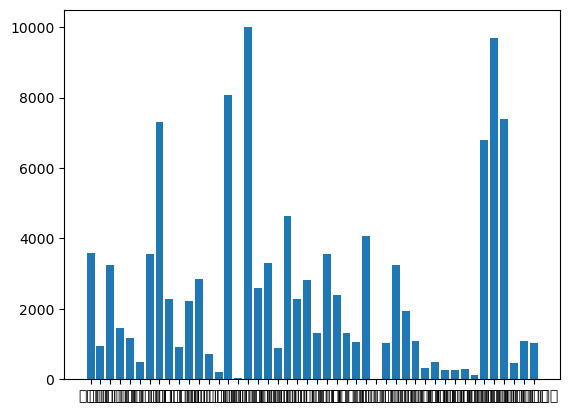

In [87]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['font.family'] = 'IPAexGothic'

%matplotlib inline

x = tmp.index
y = tmp.values

plt.bar(x,y)

## ノック１５：グラフの縦横と表示順を変えてみよう

In [88]:
tmp.sort_values(inplace=True, ascending=True)  # 昇順
tmp.head()

cityName
磐田郡豊田町       3
浜松市         47
静岡市        121
榛原郡川根本町    200
賀茂郡松崎町     253
dtype: int64

<BarContainer object of 46 artists>

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 30928 (\N{CJK UNIFIED IDEOGRAPH-78D0}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.
  func(*args, 

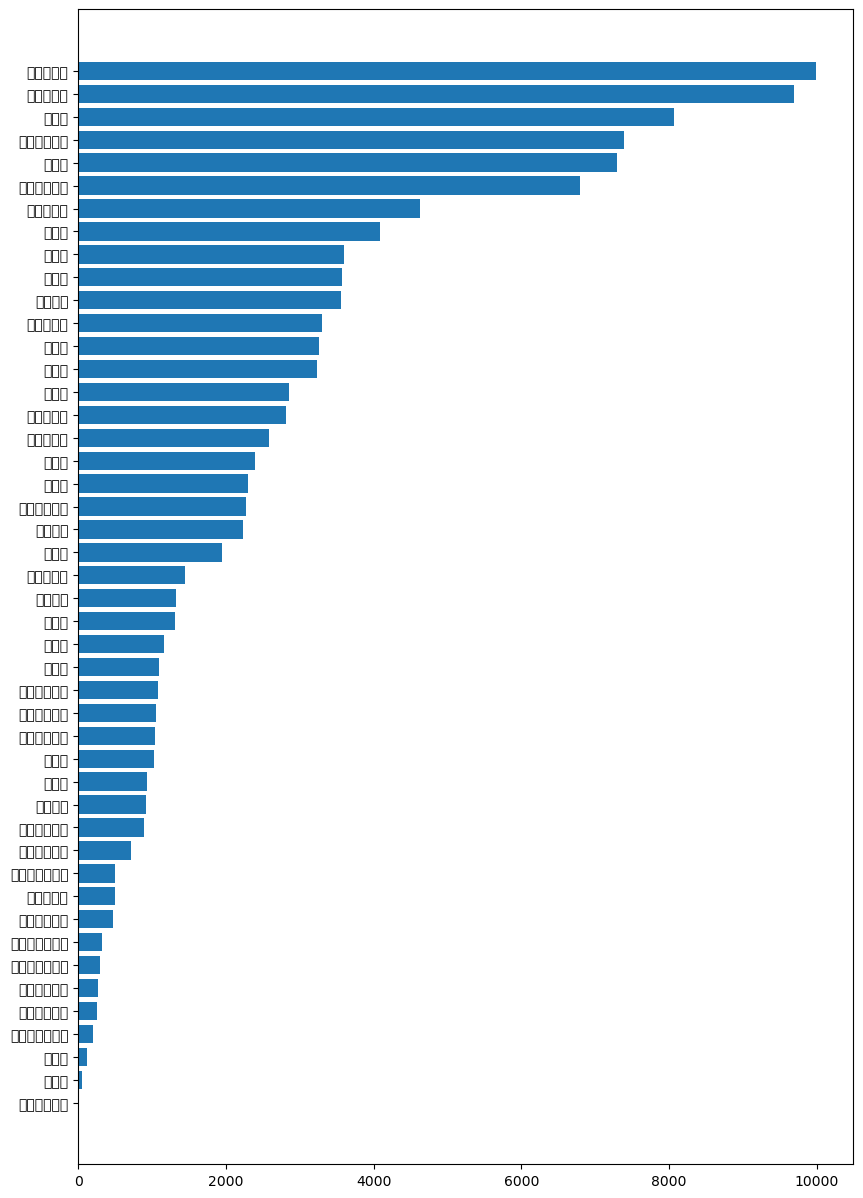

In [89]:
plt.figure(figsize=(10, 15))
x = tmp.index
y = tmp.values
plt.barh(x, y)

## ノック１６：グラフのタイトルとラベルを設定しよう

降順に並べ、上位１０ずつをグラフ化

<BarContainer object of 10 artists>

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27996 (\N{CJK UNIFIED IDEOGRAPH-6D5C}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26494 (\N{CJK UNIFIED IDEOGRAPH-677E}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'IPA

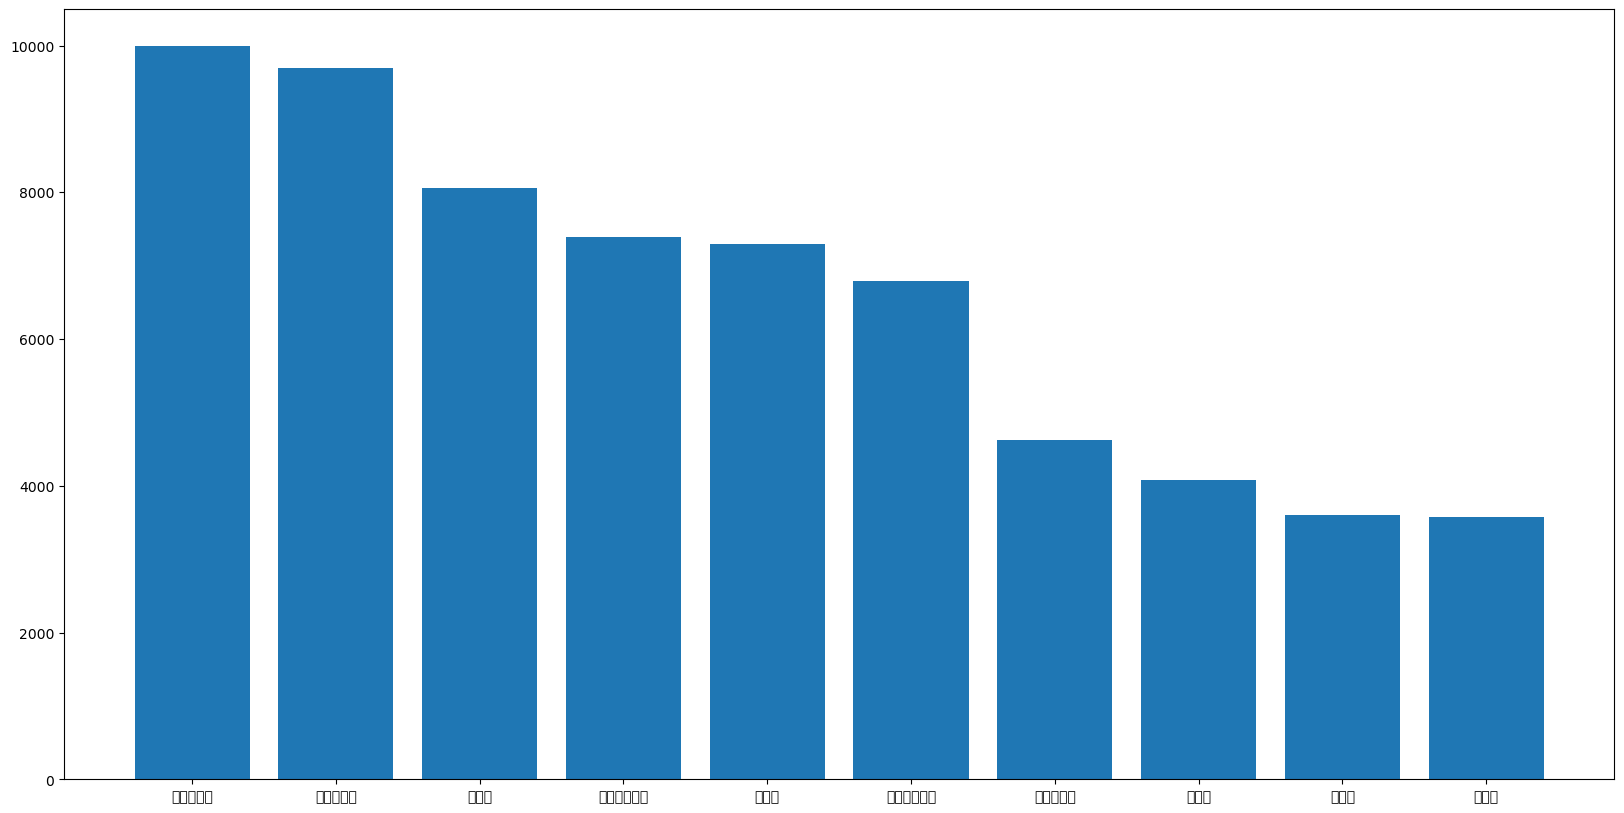

In [90]:
tmp.sort_values(inplace=True, ascending=False)
plt.figure(figsize=(20, 10))
x = tmp[:10].index
y = tmp[:10].values
plt.bar(x, y)

In [123]:
print(tmp[:10])

cityName
浜松市中区     9994
静岡市葵区     9696
沼津市       8060
静岡市駿河区    7384
富士市       7300
静岡市清水区    6796
浜松市東区     4626
磐田市       4078
三島市       3596
焼津市       3568
dtype: int64


Text(0, 0.5, '法人数')

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/o

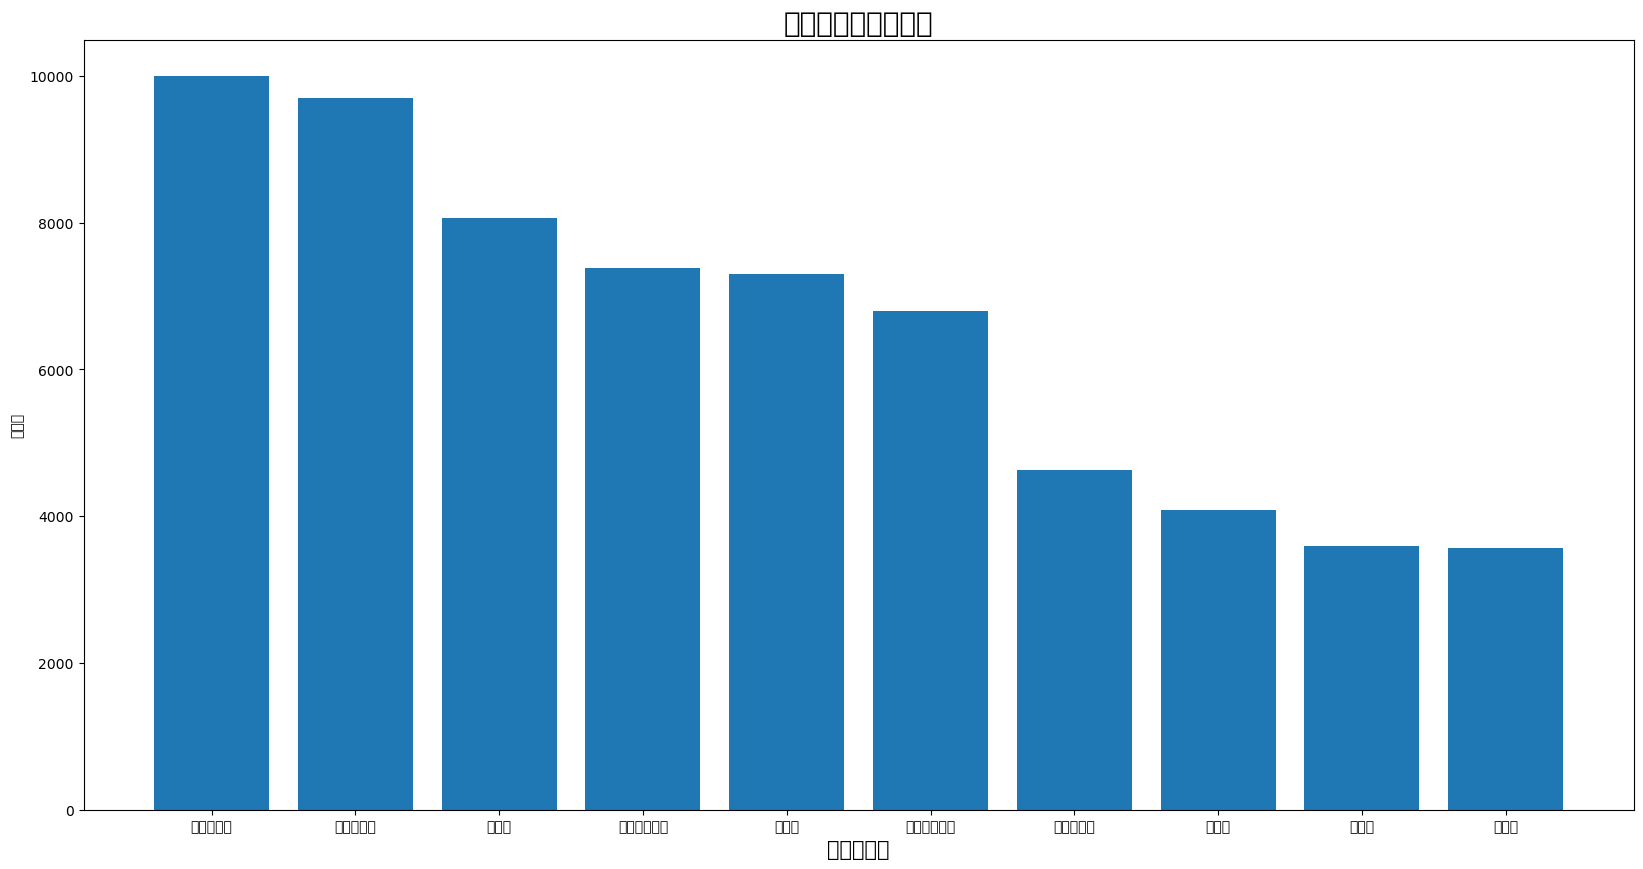

In [124]:
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.title('市区町村別の法人数', fontsize=20)
plt.xlabel('市区町村名', fontsize=15)
plt.ylabel('法人数')


## ノック１７：グラフの見た目をもっと変えてみよう

Text(7.5, 9000, '上位10の自治体を抜粋して表示')

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'IPAexGothic' not found.
fi

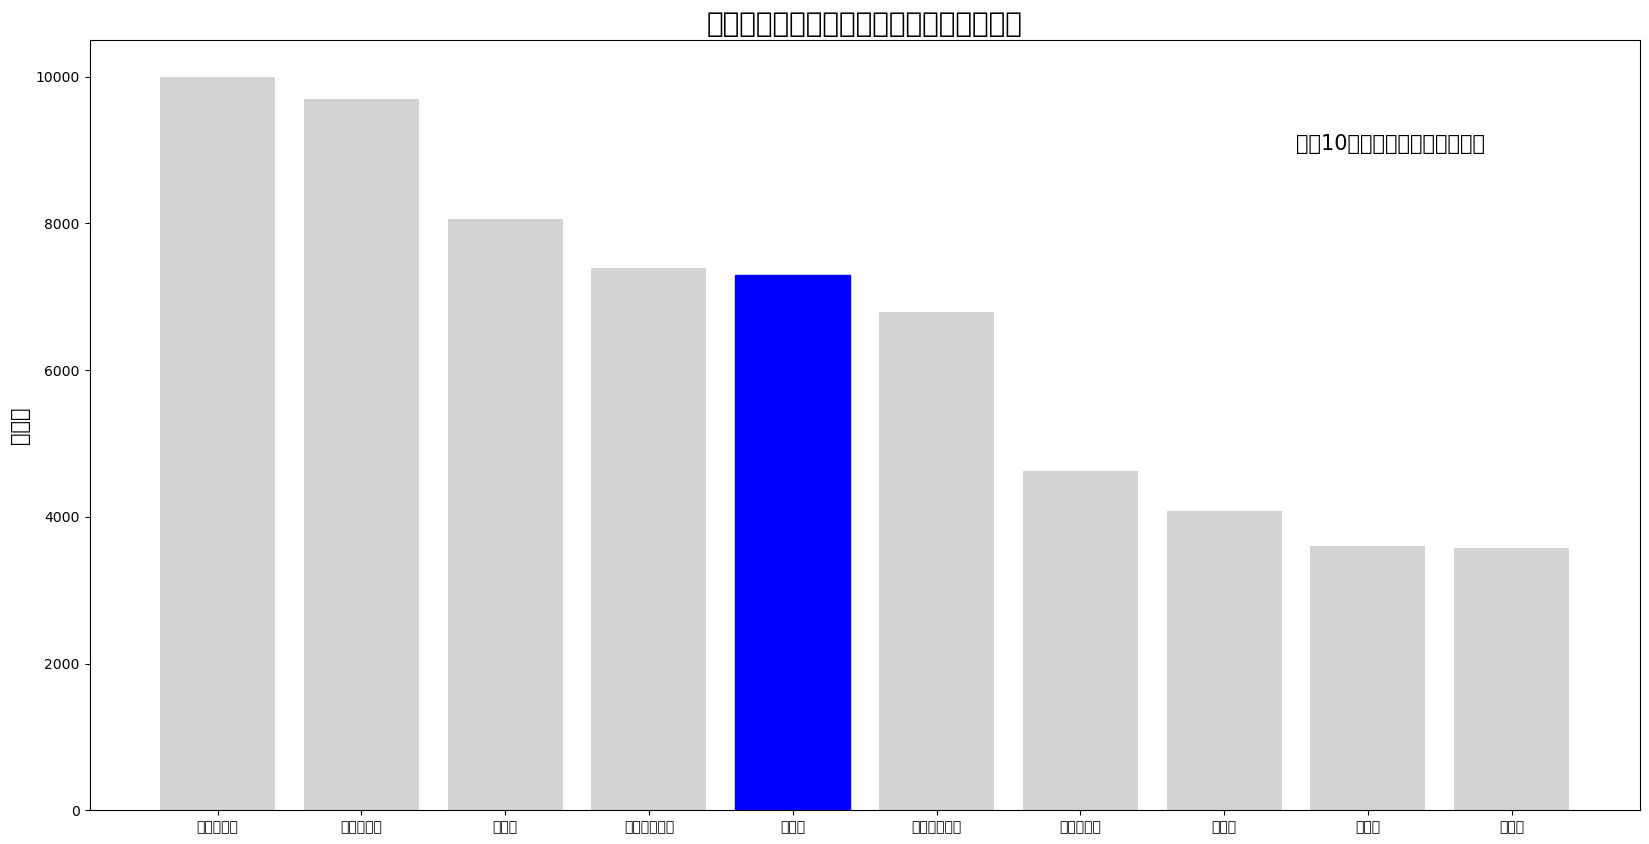

In [125]:
tmp.sort_values(inplace=True,ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
fig, ax = plt.subplots(figsize=(20,10))
bar_list = ax.bar(x, y, color='lightgray') # ひとつひとつの棒をリストに格納
bar_list[4].set_color('blue')
ax.set_title('自治体別法人数における富士市の位置づけ', fontsize=20);
ax.set_ylabel('法人数', fontsize=15)
ax.text(7.5, 9000, '上位10の自治体を抜粋して表示', fontsize=15)

## ノック１８：９０日以内に新規登録された法人数を可視化してみよう

### 1.現在の日時を取得する方法

In [93]:
base_time = pd.Timestamp.now(tz='Asia/Tokyo')
base_time

Timestamp('2022-10-03 11:18:28.380589+0900', tz='Asia/Tokyo')

In [94]:
print(len(data))
data.head()

114757


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
2,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04
3,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04
4,掛川市,1000020222135,掛川市,地方公共団体,新規,2015-10-05,2020-09-29,2020,2020-09


In [95]:
print(data.dtypes)

cityName                      object
corporateNumber               object
name                          object
corp_kind_name                object
process_kbn_name              object
assignmentDate        datetime64[ns]
updateDate            datetime64[ns]
update_fiscal_year             int64
update_YM                  period[M]
dtype: object


In [96]:
print(type(base_time))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


assignmentDateと、base_timeのデータ型が異なるので、assignmentDateをTimestamp型に変換

In [97]:
data['assignmentDate'] = data['assignmentDate'].dt.tz_localize('Asia/Tokyo') # タイムゾーンを変換
data.head()

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
3,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
4,掛川市,1000020222135,掛川市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09


指定した90日という日にちをtimedelta型に変換 → 90日じゃ一つも引っかからないので1000日にした

In [98]:
delta = pd.Timedelta(1000, 'days')  # pd.to_timedelta を使用して、スカラー、配列、リスト、またはシリーズを、認識されたtimedelta形式/値から Timedelta タイプに変換できます
tmp = data.loc[(data['process_kbn_name'] == '新規') & (base_time - data['assignmentDate'] <= delta)]
print(len(tmp))
tmp.head()

2849


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
1886,静岡市駿河区,1080001023289,株式会社ｃｒｏｗ−ｂａｒ,株式会社,新規,2020-01-08 00:00:00+09:00,2020-01-10,2019,2020-01
1887,牧之原市,1080001023297,株式会社幸福丸,株式会社,新規,2020-01-09 00:00:00+09:00,2020-01-14,2019,2020-01
1888,榛原郡吉田町,1080001023322,株式会社辻製作所,株式会社,新規,2020-01-10 00:00:00+09:00,2020-01-14,2019,2020-01
1889,島田市,1080001023330,株式会社Ｍｉｎｏｒｉ,株式会社,新規,2020-01-15 00:00:00+09:00,2020-01-15,2019,2020-01
1890,静岡市葵区,1080001023347,株式会社サンタアムール,株式会社,新規,2020-01-23 00:00:00+09:00,2020-01-23,2019,2020-01


シンプルな棒グラフで可視化する

<BarContainer object of 10 artists>

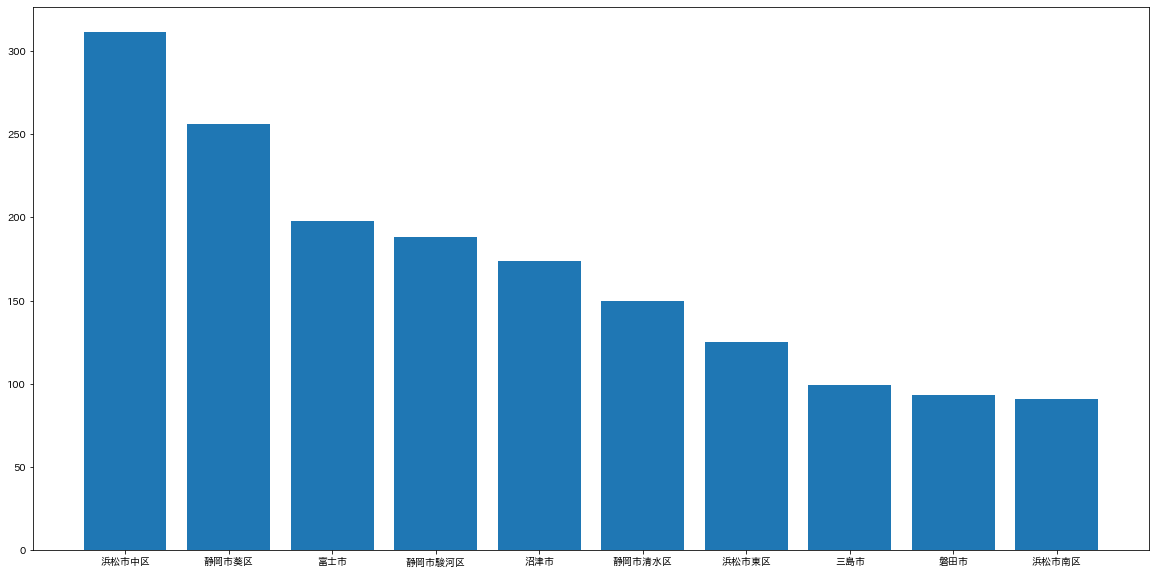

In [99]:
tmp = tmp.groupby('cityName').size()
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
plt.figure(figsize=(20, 10))
plt.bar(x, y)

### 2.日付を手入力する場合

In [100]:
base_time = pd.Timestamp('2020-04-16', tz='Asia/Tokyo')
tmp = data.loc[(data['process_kbn_name'] == '新規') & (base_time - data['assignmentDate'] <= delta)]
print(len(tmp))
tmp.head()

7516


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
1753,静岡市駿河区,1080001021730,株式会社ＳＩＮ,株式会社,新規,2017-08-09 00:00:00+09:00,2018-08-23,2018,2018-08
1754,藤枝市,1080001021739,ケイ・エム・ジー株式会社,株式会社,新規,2017-08-04 00:00:00+09:00,2017-08-09,2017,2017-08
1758,静岡市清水区,1080001021771,株式会社タマキ,株式会社,新規,2017-08-23 00:00:00+09:00,2017-08-28,2017,2017-08
1761,藤枝市,1080001021821,株式会社かえるの家,株式会社,新規,2017-09-12 00:00:00+09:00,2017-09-15,2017,2017-09
1762,島田市,1080001021838,イノス株式会社,株式会社,新規,2017-09-21 00:00:00+09:00,2017-09-26,2017,2017-09


<BarContainer object of 10 artists>

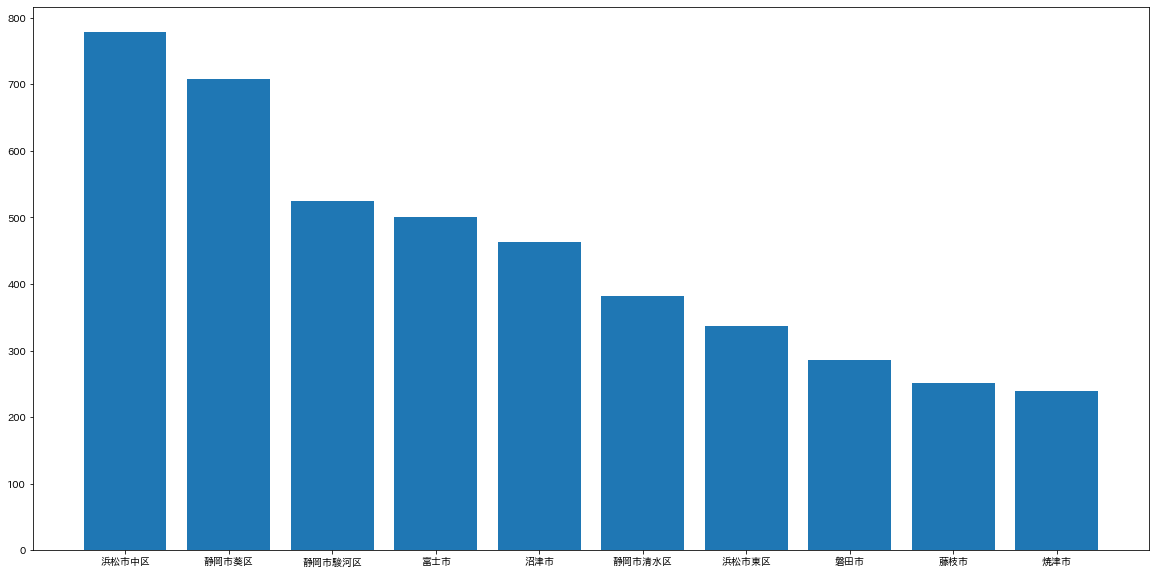

In [101]:
tmp = tmp.groupby(by='cityName').size()
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
plt.figure(figsize=(20, 10))
plt.bar(x, y)

## ノック１９：年度別の推移を可視化しよう

今回は、対象データを政令指令都市に絞る→市町村区が区で終わるものだけ抽出

In [102]:
tmp = data.dropna(subset=['cityName'])
tmp = tmp.loc[tmp['cityName'].str.match('^.+区$')]  # ？
print(len(tmp))
tmp.head()

50348


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
14,浜松市中区,1000030220005,赤佐財産区,地方公共団体,新規,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09
28,浜松市中区,1010001050158,中貿開発株式会社,株式会社,新規,2015-10-05 00:00:00+09:00,2018-08-02,2018,2018-08
29,浜松市中区,1010001076005,デュメンオレンジジャパン株式会社,株式会社,商号又は名称の変更,2015-10-05 00:00:00+09:00,2021-03-26,2020,2021-03


2016年度から、2021年度未満の行だけ抽出

In [103]:
tmp = tmp.loc[(tmp['update_fiscal_year'] >= 2016) & (tmp['update_fiscal_year'] < 2021)]
print(len(tmp))
tmp.head()

26352


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
14,浜松市中区,1000030220005,赤佐財産区,地方公共団体,新規,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09
28,浜松市中区,1010001050158,中貿開発株式会社,株式会社,新規,2015-10-05 00:00:00+09:00,2018-08-02,2018,2018-08
29,浜松市中区,1010001076005,デュメンオレンジジャパン株式会社,株式会社,商号又は名称の変更,2015-10-05 00:00:00+09:00,2021-03-26,2020,2021-03


区ごとに法人数を算出

In [104]:
tmp = tmp.groupby(['cityName', 'update_fiscal_year']).size()
tmp.name = 'count'
tmp = tmp.reset_index()  # グループ化をしたあとはインデックスが整っていない場合もある
print(len(tmp))
tmp.head(6)

50


,cityName,update_fiscal_year,count
0,浜松市中区,2016,742
1,浜松市中区,2017,365
2,浜松市中区,2018,1887
3,浜松市中区,2019,1302
4,浜松市中区,2020,1134
5,浜松市北区,2016,96


## ノック２０：データとグラフを出力しよう

seaborn を用いて折れ線グラフで可視化する

In [105]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator  # Matplotlib 図の目盛り数を設定する.
# 今回は、年度の型がintなので、年度に小数点が入ってしまう。xaxisでx軸に適用させている。

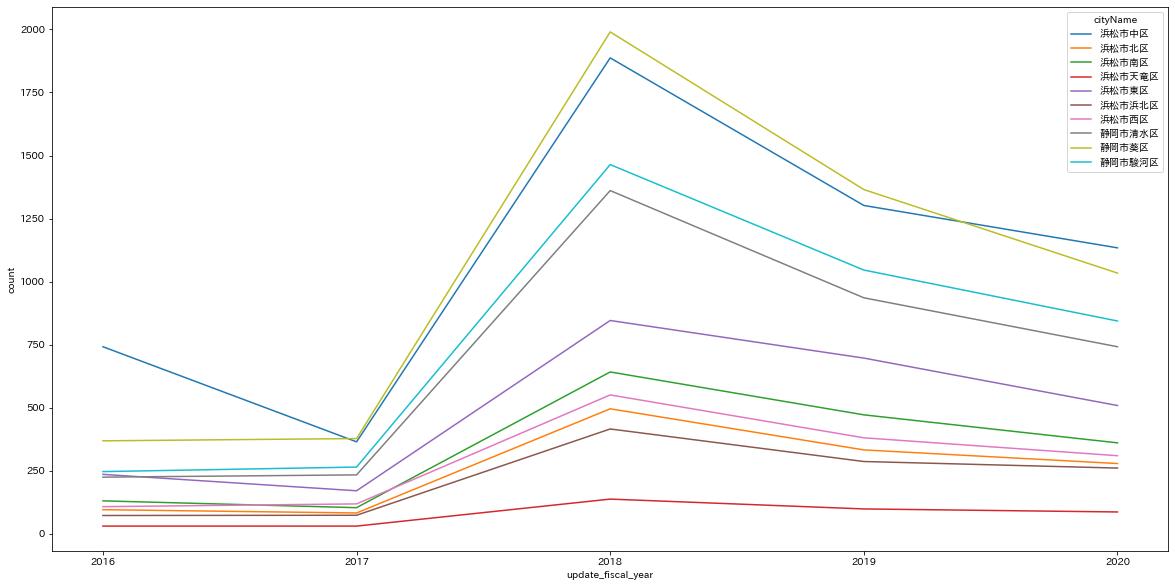

In [106]:
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
img = sns.lineplot(x=tmp['update_fiscal_year'],y=tmp['count'],hue=tmp['cityName'])  # ファイル出力するため、グラフをimgに入れる

In [107]:
data_file = 'knock20_graphdata.csv'
data.to_csv(os.path.join(output_dir, data_file), index=False)

NameError: name 'output_dir' is not defined

In [ ]:
graph_file = 'knock20_graph.png'
fig = img.get_figure()
fig.savefig(os.path.join(output_dir, graph_file))